# Importing and Inspecting the Data

In [1]:
# import depedencies
import requests as req
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import json

In [2]:
url_covid = 'https://api.covidtracking.com/v1/states/daily.json'
# url_usa_population = 'https://datausa.io/api/data?drilldowns=Nation&measures=Population&year=latest'
url_state_population = 'https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest'

In [3]:
# retrieving API and storing data in variables
covid_js = req.get(url_covid).json()
# usa_pop_js = req.get(url_usa_population).json()
state_pop_js = req.get(url_state_population).json()
print(json.dumps(state_pop_js['data'], indent=4, sort_keys=True))

[
    {
        "ID State": "04000US30",
        "ID Year": 2018,
        "Population": 1062305,
        "Slug State": "montana",
        "State": "Montana",
        "Year": "2018"
    },
    {
        "ID State": "04000US01",
        "ID Year": 2018,
        "Population": 4887871,
        "Slug State": "alabama",
        "State": "Alabama",
        "Year": "2018"
    },
    {
        "ID State": "04000US04",
        "ID Year": 2018,
        "Population": 7171646,
        "Slug State": "arizona",
        "State": "Arizona",
        "Year": "2018"
    },
    {
        "ID State": "04000US05",
        "ID Year": 2018,
        "Population": 3013825,
        "Slug State": "arkansas",
        "State": "Arkansas",
        "Year": "2018"
    },
    {
        "ID State": "04000US06",
        "ID Year": 2018,
        "Population": 39557045,
        "Slug State": "california",
        "State": "California",
        "Year": "2018"
    },
    {
        "ID State": "04000US08",
        "ID Year": 2

In [4]:
# converting the data to a dataframe for data manipulation and cleaning
covid_all = pd.DataFrame(covid_js)
# usa_pop_df = pd.DataFrame(usa_pop_js['data'])
state_pop_df = pd.DataFrame(state_pop_js['data'])
display(covid_all.head(), state_pop_df.head())

,date,state,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201013,AK,11039.0,NaN,503750.0,NaN,514789.0,59.0,NaN,NaN,...,514789,0,0,881fbdb23caeb53c47e5007c8599ec1624e1c68d,0,0,0,0,0,
1,20201013,AL,167193.0,20110.0,1074124.0,NaN,1221207.0,823.0,18440.0,NaN,...,1241317,0,261,19ea68f7f6d374d276ce094b7473ceb24e9e0cae,0,0,0,0,0,
2,20201013,AR,94167.0,4816.0,1073314.0,NaN,1162665.0,601.0,6069.0,246.0,...,1167481,25,109,bacc62043d22c514733768a48aecdc636d18ee3c,0,0,0,0,0,
3,20201013,AS,0.0,NaN,1616.0,NaN,1616.0,NaN,NaN,NaN,...,1616,0,0,c0f55dfd6d2f692914c72130843f6a5076fc836e,0,0,0,0,0,
4,20201013,AZ,226734.0,4930.0,1359347.0,NaN,1581151.0,706.0,20312.0,146.0,...,1586081,8,55,a01b55f1a382497ae5d8e0eb3dc920e3f38b5bea,0,0,0,0,0,


,ID State,State,ID Year,Year,Population,Slug State
0,04000US30,Montana,2018,2018,1062305,montana
1,04000US01,Alabama,2018,2018,4887871,alabama
2,04000US04,Arizona,2018,2018,7171646,arizona
3,04000US05,Arkansas,2018,2018,3013825,arkansas
4,04000US06,California,2018,2018,39557045,california


In [ ]:
# state_pop_df['Population'].sum()

In [5]:
state_pop_df['State'].nunique()

52

In [10]:
state_pop_df['State'].unique()

array(['Montana', 'Alabama', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Alaska', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [11]:
# inspecting data
display(covid_all.shape, state_pop_df.shape)

(12533, 55)

(52, 6)

In [12]:
# inspecting data
covid_all.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,1.253300e+04,12431.000000,3749.000000,1.229300e+04,1414.000000,1.252200e+04,9649.000000,7183.000000,5528.000000,2073.000000,...,1.253300e+04,12533.000000,1.253300e+04,12533.000000,12533.000000,12533.0,12533.0,12533.0,12533.0,12533.0
mean,2.020064e+07,56582.746521,3079.822353,6.496512e+05,1284.128006,7.153370e+05,855.548036,7084.630238,299.410094,1093.367583,...,6.934779e+05,9363.286125,6.933330e+05,16.560839,34.010293,0.0,0.0,0.0,0.0,0.0
std,2.138532e+02,110111.457279,4063.631171,1.377253e+06,5264.051527,1.475698e+06,1616.527372,14647.377245,540.379601,1042.747667,...,1.465202e+06,17904.637836,1.465156e+06,45.593136,227.960329,0.0,0.0,0.0,0.0,0.0
min,2.020012e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.000000,...,0.000000e+00,-336892.000000,0.000000e+00,-213.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020043e+07,1718.000000,441.000000,3.216200e+04,21.000000,3.065975e+04,104.000000,558.000000,55.000000,284.000000,...,3.026100e+04,579.000000,2.983500e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020062e+07,14912.000000,1708.000000,1.937040e+05,172.000000,2.192580e+05,374.000000,2361.000000,133.000000,812.000000,...,2.028250e+05,3456.000000,2.024220e+05,4.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020082e+07,63130.500000,4018.000000,6.594740e+05,551.500000,7.365872e+05,875.000000,7356.000000,283.000000,1520.000000,...,7.130720e+05,10343.000000,7.130720e+05,14.000000,24.000000,0.0,0.0,0.0,0.0,0.0
max,2.020101e+07,852406.000000,27401.000000,1.548131e+07,64400.000000,1.633372e+07,18825.000000,89995.000000,5225.000000,5523.000000,...,1.633372e+07,187926.000000,1.633372e+07,951.000000,16373.000000,0.0,0.0,0.0,0.0,0.0


In [13]:
# # inspecting data: fields (also by reviewing API documentation)
covid_all.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResults', 'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'dataQualityGrade',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'dateChecked', 'totalTestsViral', 'positiveTestsViral',
       'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed',
       'deathProbable', 'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResultsIncrease', 'posNe

In [14]:
# # inspecting data: data types
covid_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12533 entries, 0 to 12532
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         12533 non-null  int64  
 1   state                        12533 non-null  object 
 2   positive                     12431 non-null  float64
 3   probableCases                3749 non-null   float64
 4   negative                     12293 non-null  float64
 5   pending                      1414 non-null   float64
 6   totalTestResults             12522 non-null  float64
 7   hospitalizedCurrently        9649 non-null   float64
 8   hospitalizedCumulative       7183 non-null   float64
 9   inIcuCurrently               5528 non-null   float64
 10  inIcuCumulative              2073 non-null   float64
 11  onVentilatorCurrently        4586 non-null   float64
 12  onVentilatorCumulative       722 non-null    float64
 13  recovered       

# Data Cleaning
## covid_df
#### Removing the following columns as they don't return required data, as well as deprecated fields reported in the documentation:

In [15]:
# list of fields: all, not-required, and deprecated fields
all_fields = ['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResults', 'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'dataQualityGrade',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'dateChecked', 'totalTestsViral', 'positiveTestsViral',
       'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed',
       'deathProbable', 'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsSource', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade']
deprecated_fields = ['checkTimeEt', 'commercialScore', 'dateChecked', 'dateModified', 
                     'grade', 'hash', 'hospitalized', 'negativeIncrease', 
                     'negativeRegularScore', 'negativeScore', 'posNeg', 'positiveScore', 
                     'score', 'total', 'totalTestResultsSource']
non_required_fields = ['deathConfirmed', 'deathProbable', 'lastUpdateEt', 
                       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral', 
                       'positiveCasesViral', 'probableCases', 'negative', 'recovered',
                       'pending', 'totalTestEncountersViral', 'totalTestsPeopleViral', 
                       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
                       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
                       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen', 
                       'positiveTestsPeopleAntigen','totalTestsAntigen', 'positiveTestsAntigen', 
                       'totalTestResultsIncrease', 'totalTestResults']

In [16]:
# removing deprecated and non-required fields to obtain the filtered list
filtered_fields = []
for i in all_fields:
    if i not in deprecated_fields and i not in non_required_fields:
        filtered_fields.append(i)
filtered_fields

['date',
 'state',
 'positive',
 'hospitalizedCurrently',
 'hospitalizedCumulative',
 'inIcuCurrently',
 'inIcuCumulative',
 'onVentilatorCurrently',
 'onVentilatorCumulative',
 'dataQualityGrade',
 'death',
 'fips',
 'positiveIncrease',
 'deathIncrease',
 'hospitalizedIncrease']

In [17]:
# new DF with the filtered fields
covid_df = covid_all[filtered_fields]
covid_df.head() # still think 23 columns is a lot to deal with for the prohect

,date,state,positive,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dataQualityGrade,death,fips,positiveIncrease,deathIncrease,hospitalizedIncrease
0,20201013,AK,11039.0,59.0,NaN,NaN,NaN,8.0,NaN,A,60.0,02,155,0,0
1,20201013,AL,167193.0,823.0,18440.0,NaN,1896.0,NaN,1072.0,A,2665.0,01,1117,0,261
2,20201013,AR,94167.0,601.0,6069.0,246.0,NaN,105.0,747.0,A+,1611.0,05,680,25,109
3,20201013,AS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,D,0.0,60,0,0,0
4,20201013,AZ,226734.0,706.0,20312.0,146.0,NaN,88.0,NaN,A+,5767.0,04,684,8,55


In [18]:
# converting date-string format to date
covid_df['date'] = pd.to_datetime(covid_df['date'], format='%Y%m%d')
covid_df.head()

/Users/emiliobello/opt/anaconda3/envs/NewPythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,state,positive,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dataQualityGrade,death,fips,positiveIncrease,deathIncrease,hospitalizedIncrease
0,2020-10-13,AK,11039.0,59.0,NaN,NaN,NaN,8.0,NaN,A,60.0,02,155,0,0
1,2020-10-13,AL,167193.0,823.0,18440.0,NaN,1896.0,NaN,1072.0,A,2665.0,01,1117,0,261
2,2020-10-13,AR,94167.0,601.0,6069.0,246.0,NaN,105.0,747.0,A+,1611.0,05,680,25,109
3,2020-10-13,AS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,D,0.0,60,0,0,0
4,2020-10-13,AZ,226734.0,706.0,20312.0,146.0,NaN,88.0,NaN,A+,5767.0,04,684,8,55


### More Inspection

In [19]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12533 entries, 0 to 12532
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    12533 non-null  datetime64[ns]
 1   state                   12533 non-null  object        
 2   positive                12431 non-null  float64       
 3   hospitalizedCurrently   9649 non-null   float64       
 4   hospitalizedCumulative  7183 non-null   float64       
 5   inIcuCurrently          5528 non-null   float64       
 6   inIcuCumulative         2073 non-null   float64       
 7   onVentilatorCurrently   4586 non-null   float64       
 8   onVentilatorCumulative  722 non-null    float64       
 9   dataQualityGrade        12533 non-null  object        
 10  death                   11781 non-null  float64       
 11  fips                    12533 non-null  object        
 12  positiveIncrease        12533 non-null  int64 

In [26]:
# validating results by state and inspecting dates
covid_df.groupby(['state']).agg({'positiveIncrease': 'sum', 'deathIncrease': 'sum', 'date': 'count', 'date': ['min', 'max']})
# https://covid.cdc.gov/covid-data-tracker/#cases_casesinlast7days

positiveIncrease deathIncrease       date           
                   sum           sum        min        max
state                                                     
AK               11039            60 2020-03-06 2020-10-13
AL              167193          2665 2020-03-07 2020-10-13
AR               94167          1611 2020-03-06 2020-10-13
AS                   0             0 2020-03-16 2020-10-13
AZ              226732          5767 2020-03-04 2020-10-13
CA              852353         16581 2020-03-04 2020-10-13
CO               79035          1998 2020-03-05 2020-10-13
CT               61697          4533 2020-03-07 2020-10-13
DC               16068           637 2020-03-05 2020-10-13
DE               22394           659 2020-03-06 2020-10-13
FL              738747         15722 2020-03-04 2020-10-13
GA              333302          7454 2020-03-04 2020-10-13
GU                3263            61 2020-03-16 2020-10-13
HI               13712           169 2020-03-04 2020-10-13
IA               96338          1485 2020-03-06 2020-10-13
ID               48663           510 2020-03-07 2020-10-13
IL              327777          9272 2020-03-04 2020-10-13
IN              138103          3822 2020-03-06 2020-10-13
KS               67862           771 2020-03-06 2020-10-13
KY               81691          1269 2020-03-06 2020-10-13
LA              175329          5679 2020-03-07 2020-10-13
MA              140412          9630 2020-01-22 2020-10-13
MD              132343          4012 2020-03-05 2020-10-13
ME                5780           143 2020-03-07 2020-10-13
MI              152848          7255 2020-03-01 2020-10-13
MN              114573          2204 2020-03-06 2020-10-13
MO              144230          2422 2020-03-07 2020-10-13
MP                  77             2 2020-03-16 2020-10-13
MS              105941          3115 2020-03-07 2020-10-13
MT               19611           217 2020-03-07 2020-10-13
NC              234480          3816 2020-03-04 2020-10-13
ND               28245           260 2020-03-07 2020-10-13
NE               52839           522 2020-03-05 2020-10-13
NH                9277           456 2020-03-04 2020-10-13
NJ              215085         16182 2020-02-10 2020-10-13
NM               33362           915 2020-03-06 2020-10-13
NV               86834          1674 2020-03-05 2020-10-13
NY              476702         25598 2020-03-04 2020-10-13
OH              171626          5017 2020-03-05 2020-10-13
OK              101492          1119 2020-03-07 2020-10-13
OR               37777           605 2020-03-04 2020-10-13
PA              174644          8384 2020-03-06 2020-10-13
PR               54535           738 2020-03-16 2020-10-13
RI               26958          1139 2020-03-01 2020-10-13
SC              158883          3576 2020-03-04 2020-10-13
SD               29339           288 2020-03-07 2020-10-13
TN              218828          2797 2020-03-05 2020-10-13
TX              800414         16622 2020-03-04 2020-10-13
UT               87818           522 2020-03-07 2020-10-13
VA              160805          3372 2020-02-27 2020-10-13
VI                1324            20 2020-03-16 2020-10-13
VT                1886            58 2020-03-06 2020-10-13
WA               93035          2190 2020-01-22 2020-10-13
WI              163758          1518 2020-03-04 2020-10-13
WV               18555           387 2020-03-06 2020-10-13
WY                7964            57 2020-03-07 2020-10-13

In [27]:
# notice the count of dates is uneven, which is reflected by the start dates variation


In [21]:
# inspecting viz
covid_viz = covid_df.set_index(['state', 'date']).sort_index()
idx = pd.IndexSlice
select_viz = covid_viz.loc[idx[['MN'], :], :]
select_viz.positiveIncrease

state  date      
MN     2020-03-06       0
       2020-03-07       1
       2020-03-08       0
       2020-03-09       3
       2020-03-10       6
                     ... 
       2020-10-09    1390
       2020-10-10    1516
       2020-10-11    1440
       2020-10-12    1171
       2020-10-13    1135
Name: positiveIncrease, Length: 222, dtype: int64

# note: we could slice dates based on variables defined by a slicer on the dashboard

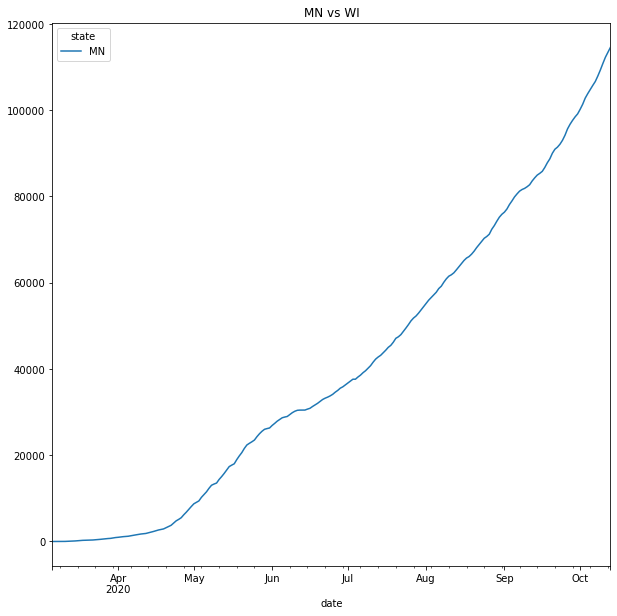

In [22]:
select_viz.positive.unstack(level='state').plot(title='MN vs WI', figsize=(10, 10));

# Data Cleaning
## state_pop_df

In [28]:
# inspecting columns
state_pop_df.columns

Index(['ID State', 'State', 'ID Year', 'Year', 'Population', 'Slug State'], dtype='object')

In [31]:
state_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID State    52 non-null     object
 1   State       52 non-null     object
 2   ID Year     52 non-null     int64 
 3   Year        52 non-null     object
 4   Population  52 non-null     int64 
 5   Slug State  52 non-null     object
 6   fips        52 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.0+ KB


In [40]:
# defining fips field from ID state. This new column will be used for merging
state_pop_df['fips'] = state_pop_df['ID State'].str[-2:]

In [38]:
state_df = state_pop_df[['State', 'fips', 'Population']]
state_df.head(53)

,State,fips,Population
0,Montana,30,1062305
1,Alabama,01,4887871
2,Arizona,04,7171646
3,Arkansas,05,3013825
4,California,06,39557045
5,Colorado,08,5695564
6,Connecticut,09,3572665
7,Delaware,10,967171
8,District of Columbia,11,702455
9,Florida,12,21299325


# Merging Datasets

In [41]:
covid_df['fips'].unique()

array(['02', '01', '05', '60', '04', '06', '08', '09', '11', '10', '12',
       '13', '66', '15', '19', '16', '17', '18', '20', '21', '22', '25',
       '24', '23', '26', '27', '29', '69', '28', '30', '37', '38', '31',
       '33', '34', '35', '32', '36', '39', '40', '41', '42', '72', '44',
       '45', '46', '47', '48', '49', '51', '78', '50', '53', '55', '54',
       '56'], dtype=object)

In [42]:
covid_wpop = covid_df.merge(state_df, how='inner', on='fips')
covid_wpop.head()

,date,state,positive,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dataQualityGrade,death,fips,positiveIncrease,deathIncrease,hospitalizedIncrease,State,Population
0,2020-10-13,AK,11039.0,59.0,NaN,NaN,NaN,8.0,NaN,A,60.0,02,155,0,0,Alaska,737438
1,2020-10-12,AK,10884.0,52.0,NaN,NaN,NaN,8.0,NaN,A,60.0,02,198,0,0,Alaska,737438
2,2020-10-11,AK,10686.0,57.0,NaN,NaN,NaN,7.0,NaN,A,60.0,02,258,0,0,Alaska,737438
3,2020-10-10,AK,10428.0,66.0,NaN,NaN,NaN,10.0,NaN,A,60.0,02,252,0,0,Alaska,737438
4,2020-10-09,AK,10176.0,51.0,NaN,NaN,NaN,6.0,NaN,A,60.0,02,180,0,0,Alaska,737438


In [43]:
covid_wpop[covid_wpop.Population == 0]

,date,state,positive,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,dataQualityGrade,death,fips,positiveIncrease,deathIncrease,hospitalizedIncrease,State,Population


In [44]:
covid_wpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11685 entries, 0 to 11684
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    11685 non-null  datetime64[ns]
 1   state                   11685 non-null  object        
 2   positive                11598 non-null  float64       
 3   hospitalizedCurrently   9490 non-null   float64       
 4   hospitalizedCumulative  7086 non-null   float64       
 5   inIcuCurrently          5421 non-null   float64       
 6   inIcuCumulative         2073 non-null   float64       
 7   onVentilatorCurrently   4567 non-null   float64       
 8   onVentilatorCumulative  722 non-null    float64       
 9   dataQualityGrade        11685 non-null  object        
 10  death                   10982 non-null  float64       
 11  fips                    11685 non-null  object        
 12  positiveIncrease        11685 non-null  int64 

In [45]:
display(covid_wpop['state'].nunique(), covid_df['state'].nunique())

52

56

In [46]:
covid_indexed = covid_wpop.set_index(['state', 'date']).sort_index()

In [50]:
covid_indexed

positive  hospitalizedCurrently  hospitalizedCumulative  \
state date                                                                  
AK    2020-03-06       0.0                    NaN                     NaN   
      2020-03-07       0.0                    NaN                     NaN   
      2020-03-08       0.0                    NaN                     NaN   
      2020-03-09       0.0                    NaN                     NaN   
      2020-03-10       0.0                    NaN                     NaN   
...                    ...                    ...                     ...   
WY    2020-10-09    7335.0                   54.0                   317.0   
      2020-10-10    7455.0                   54.0                   323.0   
      2020-10-11    7611.0                   54.0                   323.0   
      2020-10-12    7802.0                   51.0                   338.0   
      2020-10-13    7964.0                   46.0                   343.0   

                  inIcuCurrently  inIcuCumulative  onVentilatorCurrently  \
state date                                                                 
AK    2020-03-06             NaN              NaN                    NaN   
      2020-03-07             NaN              NaN                    NaN   
      2020-03-08             NaN              NaN                    NaN   
      2020-03-09             NaN              NaN                    NaN   
      2020-03-10             NaN              NaN                    NaN   
...                          ...              ...                    ...   
WY    2020-10-09             NaN              NaN                    NaN   
      2020-10-10             NaN              NaN                    NaN   
      2020-10-11             NaN              NaN                    NaN   
      2020-10-12             NaN              NaN                    NaN   
      2020-10-13             NaN              NaN                    NaN   

                  onVentilatorCumulative dataQualityGrade  death fips  \
state date                                                              
AK    2020-03-06                     NaN                     0.0   02   
      2020-03-07                     NaN                     0.0   02   
      2020-03-08                     NaN                     0.0   02   
      2020-03-09                     NaN                     0.0   02   
      2020-03-10                     NaN                     0.0   02   
...                                  ...              ...    ...  ...   
WY    2020-10-09                     NaN                B   54.0   56   
      2020-10-10                     NaN                B   54.0   56   
      2020-10-11                     NaN                B   54.0   56   
      2020-10-12                     NaN                B   54.0   56   
      2020-10-13                     NaN                B   57.0   56   

                  positiveIncrease  deathIncrease  hospitalizedIncrease  \
state date                                                                
AK    2020-03-06                 0              0                     0   
      2020-03-07                 0              0                     0   
      2020-03-08                 0              0                     0   
      2020-03-09                 0              0                     0   
      2020-03-10                 0              0                     0   
...                            ...            ...                   ...   
WY    2020-10-09               243              0                     4   
      2020-10-10               120              0                     6   
      2020-10-11               156              0                     0   
      2020-10-12               191              0                    15   
      2020-10-13               162              3                     5   

                    State  Population  
state date                             
AK    2020-03-06   Al

In [56]:
covid_indexed['positiveRollingAvg'] = covid_indexed.groupby(level=0)['positiveIncrease'].rolling(window=7).mean().values
covid_indexed

positive  hospitalizedCurrently  hospitalizedCumulative  \
state date                                                                  
AK    2020-03-06       0.0                    NaN                     NaN   
      2020-03-07       0.0                    NaN                     NaN   
      2020-03-08       0.0                    NaN                     NaN   
      2020-03-09       0.0                    NaN                     NaN   
      2020-03-10       0.0                    NaN                     NaN   
...                    ...                    ...                     ...   
WY    2020-10-09    7335.0                   54.0                   317.0   
      2020-10-10    7455.0                   54.0                   323.0   
      2020-10-11    7611.0                   54.0                   323.0   
      2020-10-12    7802.0                   51.0                   338.0   
      2020-10-13    7964.0                   46.0                   343.0   

                  inIcuCurrently  inIcuCumulative  onVentilatorCurrently  \
state date                                                                 
AK    2020-03-06             NaN              NaN                    NaN   
      2020-03-07             NaN              NaN                    NaN   
      2020-03-08             NaN              NaN                    NaN   
      2020-03-09             NaN              NaN                    NaN   
      2020-03-10             NaN              NaN                    NaN   
...                          ...              ...                    ...   
WY    2020-10-09             NaN              NaN                    NaN   
      2020-10-10             NaN              NaN                    NaN   
      2020-10-11             NaN              NaN                    NaN   
      2020-10-12             NaN              NaN                    NaN   
      2020-10-13             NaN              NaN                    NaN   

                  onVentilatorCumulative dataQualityGrade  death fips  \
state date                                                              
AK    2020-03-06                     NaN                     0.0   02   
      2020-03-07                     NaN                     0.0   02   
      2020-03-08                     NaN                     0.0   02   
      2020-03-09                     NaN                     0.0   02   
      2020-03-10                     NaN                     0.0   02   
...                                  ...              ...    ...  ...   
WY    2020-10-09                     NaN                B   54.0   56   
      2020-10-10                     NaN                B   54.0   56   
      2020-10-11                     NaN                B   54.0   56   
      2020-10-12                     NaN                B   54.0   56   
      2020-10-13                     NaN                B   57.0   56   

                  positiveIncrease  deathIncrease  hospitalizedIncrease  \
state date                                                                
AK    2020-03-06                 0              0                     0   
      2020-03-07                 0              0                     0   
      2020-03-08                 0              0                     0   
      2020-03-09                 0              0                     0   
      2020-03-10                 0              0                     0   
...                            ...            ...                   ...   
WY    2020-10-09               243              0                     4   
      2020-10-10               120              0                     6   
      2020-10-11               156              0                     0   
      2020-10-12               191              0                    15   
      2020-10-13               162              3                     5   

                    State  Population  positiveRollingAvg  
state date                               

In [66]:
covid_indexed.loc[:, covid_indexed['positiveRollingAvg']]

KeyError: "None of [Float64Index([                nan,                 nan,                 nan,\n                              nan,                 nan,                 nan,\n                              0.0, 0.14285714285714285, 0.14285714285714285,\n              0.14285714285714285,\n              ...\n               124.42857142857143,               125.0,  135.57142857142858,\n               135.85714285714286,  144.14285714285714,  160.14285714285714,\n               155.71428571428572,  158.14285714285714,  167.57142857142858,\n               170.57142857142858],\n             dtype='float64', length=11685)] are in the [columns]"